<a href="https://colab.research.google.com/github/jed1rey/curso_python_analise_de_dados/blob/main/aula_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (4).xlsx


In [5]:
df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
df.shape

(904, 16)

In [7]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#receita total  
df["Valor Venda"].sum()

5984606.1426

In [9]:
#custo total
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #coluna de custo

In [10]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [11]:
round(df["custo"].sum(),2) #custo total

2486783.05

In [12]:
#lucro total
df["lucro"] = df["Valor Venda"] - df["custo"] #coluna lucro

In [13]:
round(df["lucro"].sum(),2) #lucro total

3497823.09

In [14]:
#coluna total de dias para enviar o produto
df["tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
df["tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days #extrair apenas os dias 

In [17]:
df["tempo_envio"].dtype

dtype('int64')

In [19]:
df.groupby("Marca")["tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [20]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [27]:
#agrupar ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [26]:
pd.options.display.float_format = '{:20,.2f}'.format

In [29]:
#resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

In [30]:
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [31]:
#total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

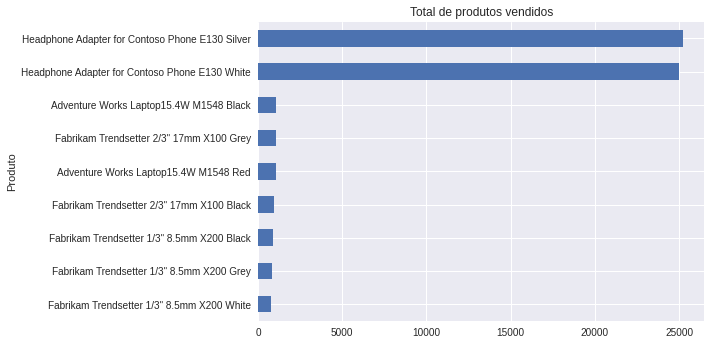

In [34]:
#gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos");

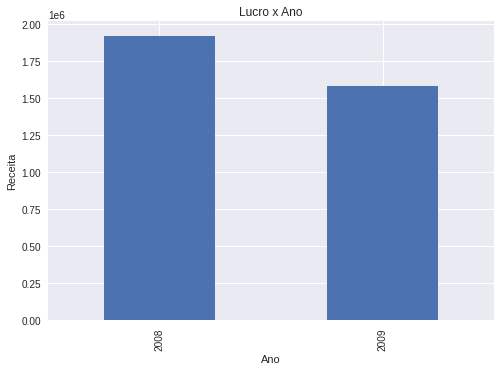

In [36]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [37]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [38]:
#vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

Text(0, 0.5, 'Lucro')

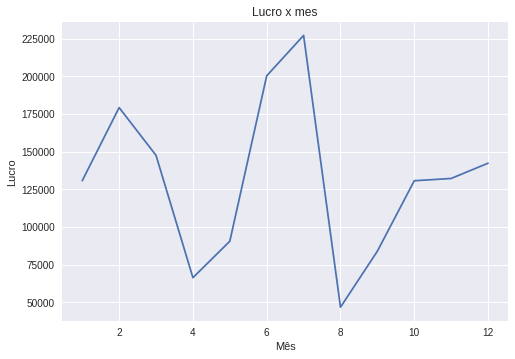

In [43]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title = "Lucro x mes")
plt.xlabel("Mês")
plt.ylabel("Lucro")

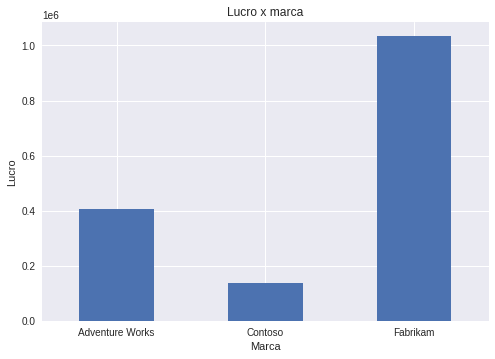

In [45]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title = "Lucro x marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

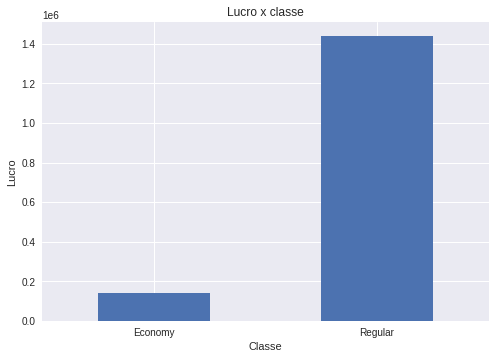

In [46]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title = "Lucro x classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [47]:
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

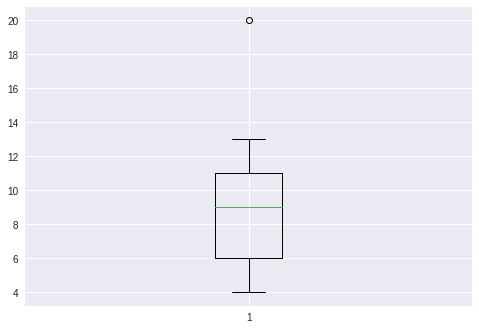

In [48]:
#grafico de boxplot
plt.boxplot(df["tempo_envio"]);

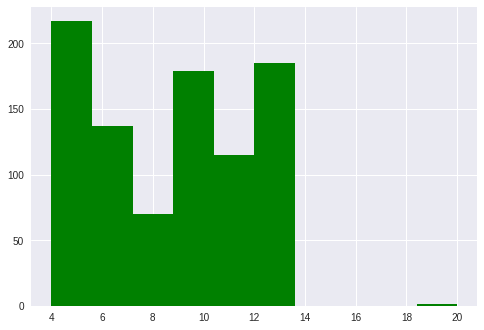

In [50]:
#histograma
plt.hist(df["tempo_envio"], color = "green");

In [52]:
df[df["tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [54]:
df['tempo_envio'].max()

20

In [55]:
df.to_csv("df_vendas_novo.csv", index= False)